## Gradiant Boosting Algorithm

Gradient Boosting is an ensemble machine learning technique that builds a strong model by combining many weak models (usually decision trees).

It does this sequentially, where each new tree tries to correct the errors of the previous trees.

## Why is it called Gradient Boosting?
The **“gradient”** part comes from gradient descent — an optimization method.

The word gradient means slope or direction to reduce error.

It uses math to find the best way to shrink the mistakes.

In each step, the algorithm minimizes a loss function (like Mean Squared Error) by moving in the direction of the negative gradient (steepest drop in error).

So each new step “walks downhill” to lower the overall error.

So, it’s boosting (improving) the model step by step using gradient descent ideas.

## Key points:

**learning rate:**  from 1.0 to 2.0

**Decision tree max depth:**  8 to 32

**Additive model:**   GB Use additive modeling

**F(x)=fo(x1)+f1(x2)+...+fn(xn)**

## How does it work?

**Input:**  sample data **{xi,yi}** i=1 to n, a differentiable loss function 

**L(y,f(x))** ➖> L(y,ypred) , number of iterations **M**

**Note:** for regression problem use use **least square loss function that will be :**

      L= 1/2 summation  i= 1 to n((y,ypred)^2
      
and for  classification problem use **log loss**

**step 1:**  initialize  fo(x1) =  mean of output column 

**step 2:**  for m=1 to M

**(a)**  for i=1,2,....N compute
    
            pseudo residual= rim =yi-fm(xi)
            
            find residual for every row of every decision tree 
            
**(b)**  fit a reegression tree to the targets rim giving terminal regions
    
    terminal regions are regions available on split.
    
**(c)** find output of all terminal region

**final step:**

        output will be F(x) =  fm(x)

## Strengths of Gradient Boosting
Handles different data types well.

Usually gives very high accuracy.

Flexible — works for regression, classification, ranking

## Weaknesses
Can overfit if not tuned properly.

Training can be slow for very large datasets.

Sensitive to outliers.

## Adaboost VS Gradiant Boosting

| Algorithm         | How it improves next model                     |
| ----------------- | ---------------------------------------------- |
| AdaBoost          | Re-weights misclassified samples               |
| Gradient Boosting | Fits new model to residuals (gradient of loss) |

#### When to Use

| AdaBoost                                | Gradient Boosting                                                                       |
| --------------------------------------- | --------------------------------------------------------------------------------------- |
| Easier to understand                    | More flexible, usually higher accuracy                                                  |
| Good for clean, less noisy data         | Can handle complex data & custom loss functions                                         |
| Less used today compared to modern GBMs | State-of-the-art models like XGBoost, LightGBM, CatBoost are based on gradient boosting |



In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
X, y = load_iris(return_X_y=True)


In [3]:
# Use only first 2 features for 2D plot
X = X[:, :2]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [5]:
gb_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [6]:
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [7]:
y_pred = gb_clf.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Classifier Accuracy: {accuracy:.2f}")

Gradient Boosting Classifier Accuracy: 0.78


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

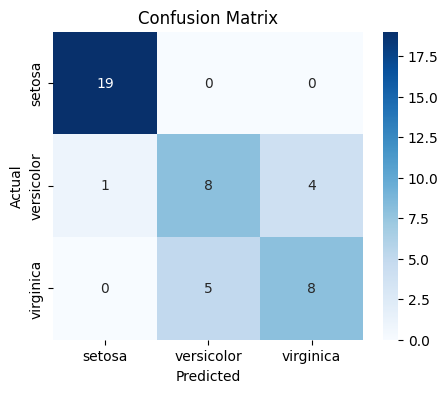

In [10]:
#  Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=load_iris().target_names,
            yticklabels=load_iris().target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
#  Plot decision boundary (for 2 features)
# Create a mesh grid
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

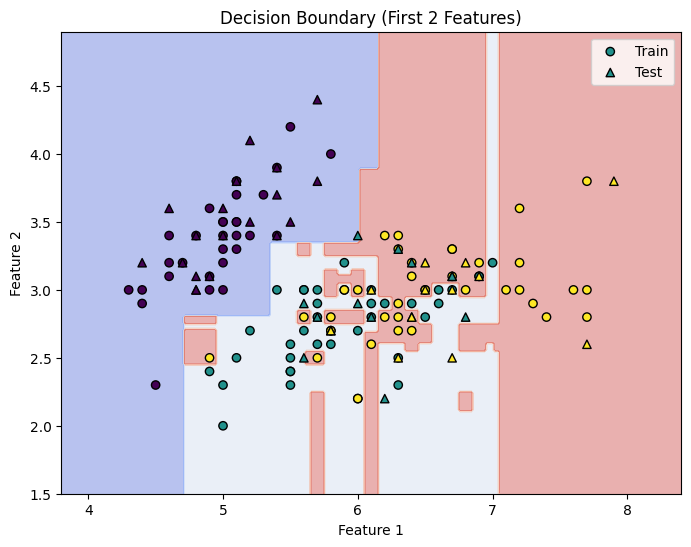

In [12]:
# Predict for grid points
Z = gb_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Train', edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='^', label='Test', edgecolor='k')
plt.title("Decision Boundary (First 2 Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

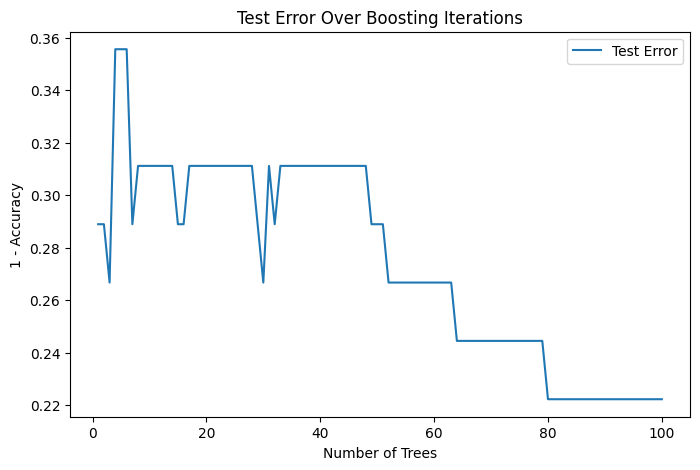

In [13]:

#  Plot training loss (deviance) over iterations
test_error = []
for y_pred_stage in gb_clf.staged_predict(X_test):
    test_error.append(1 - accuracy_score(y_test, y_pred_stage))

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, gb_clf.n_estimators + 1), test_error, label='Test Error')
plt.title("Test Error Over Boosting Iterations")
plt.xlabel("Number of Trees")
plt.ylabel("1 - Accuracy")
plt.legend()
plt.show()

## Geometric Intiution

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
np.random.seed(42) # This sets the random number generator’s seed to 42.
X = np.random.rand(100, 1) - 0.5 # X is 100 random values between -0.5 and 0.5, shaped as a column vector.
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)  # y=3x^2 +noise


In [16]:
import pandas as pd
df = pd.DataFrame()
     



In [17]:
df['X'] = X.reshape(100)
df['y'] = y
     



In [18]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'X vs Y')

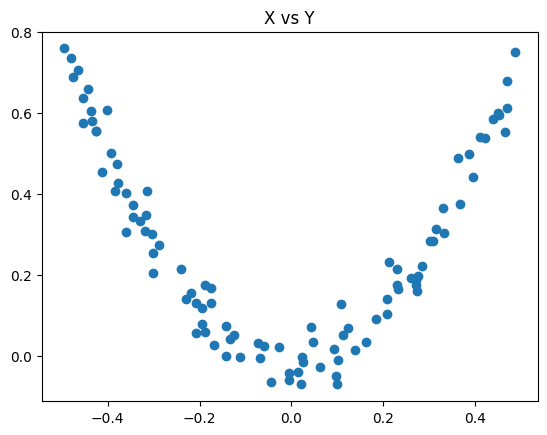

In [19]:
plt.scatter(df['X'],df['y'])
plt.title('X vs Y')

In [20]:
df['pred1'] = df['y'].mean()
     



In [21]:


df

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [22]:
df['res1'] = df['y'] - df['pred1']
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


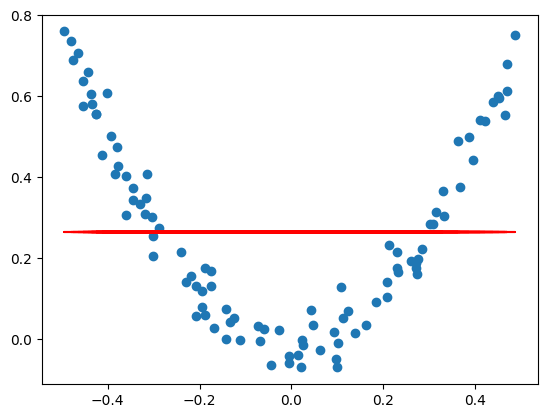

In [23]:

plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

In [24]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)
     
     

In [25]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

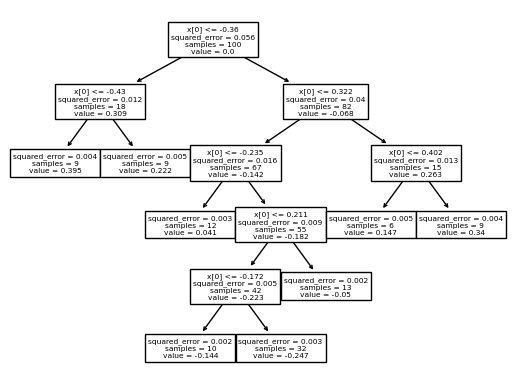

In [26]:

from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()
     

In [27]:
# generating X_test
X_test = np.linspace(-0.5, 0.5, 500)
     

In [28]:
y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))

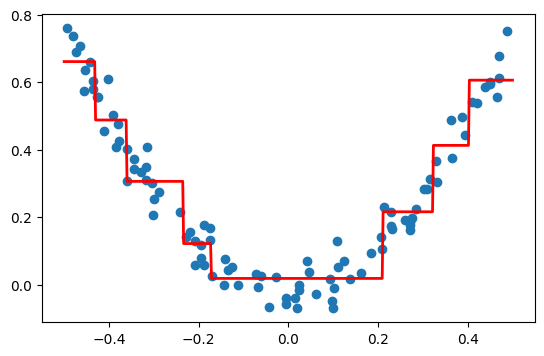

In [29]:

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [30]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))
     

In [31]:
df

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [32]:
df['res2'] = df['y'] - df['pred2']
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


In [33]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [34]:

tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [35]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

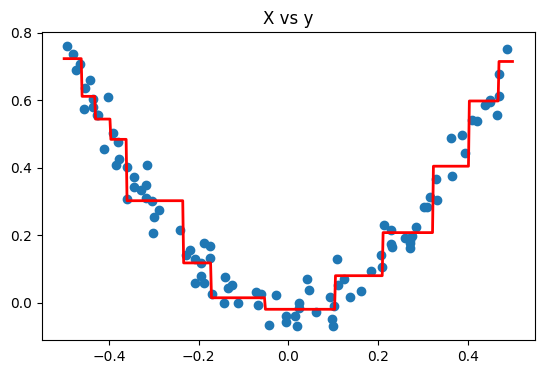

In [36]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [37]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return 
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

5


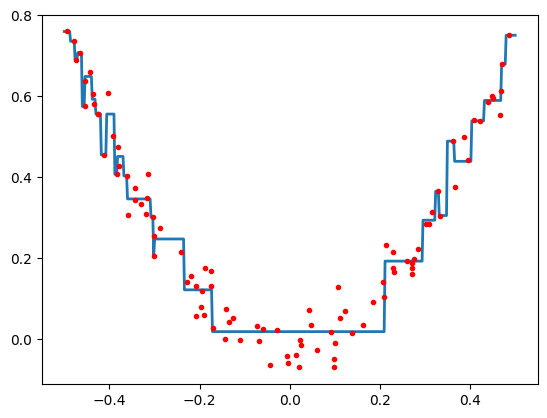

4


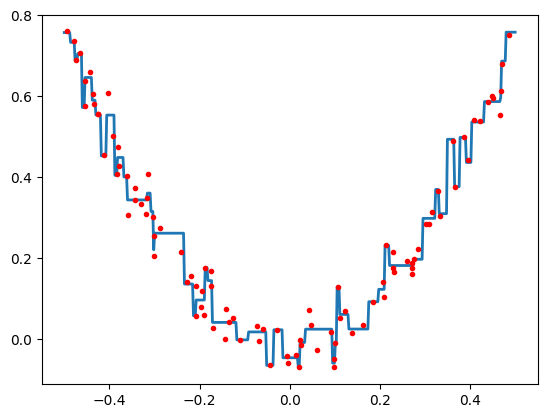

3


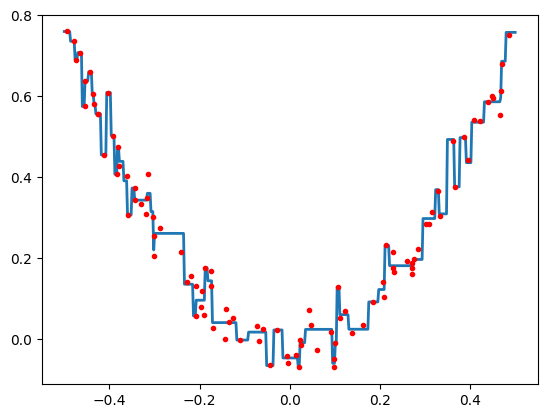

2


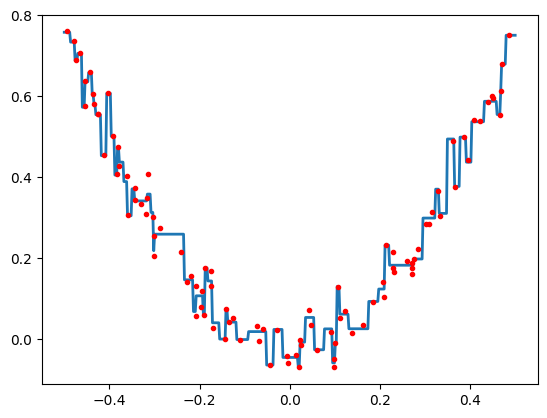

1


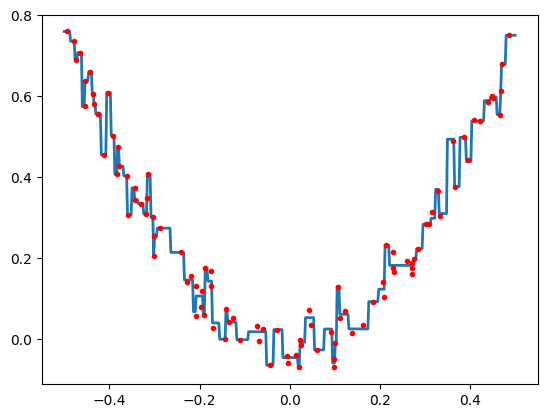

In [38]:

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)